In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload

In [2]:
data_contour = pd.read_csv('../../numerical_analysis/contour_gamma.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

,bound_0,bound_1,bound_2,bound_3,bound_4,bound_5,bound_6,bound_7,bound_8,bound_9,...,bound_189,bound_190,bound_191,bound_192,bound_193,bound_194,bound_195,bound_196,bound_197,bound_198
0,-521.400133,-520.793561,-520.474831,-520.274041,-520.137946,-520.042825,-519.976027,-519.929997,-519.899863,-519.882296,...,-534.169212,-534.264912,-534.360679,-534.456515,-534.552419,-534.648389,-534.744426,-534.840529,-534.936697,-535.032931
1,-521.393201,-520.779698,-520.454036,-520.246315,-520.103288,-520.001237,-519.927507,-519.874546,-519.837480,-519.812982,...,-532.852232,-532.941000,-533.029837,-533.118741,-533.207713,-533.296752,-533.385857,-533.475029,-533.564266,-533.653568
2,-521.389147,-520.771589,-520.441872,-520.230097,-520.083015,-519.976909,-519.899124,-519.842108,-519.800988,-519.772435,...,-532.081849,-532.166562,-532.251344,-532.336194,-532.421111,-532.506095,-532.591146,-532.676262,-532.761445,-532.846693
3,-521.386270,-520.765835,-520.433242,-520.218590,-520.068631,-519.959648,-519.878987,-519.819094,-519.775096,-519.743667,...,-531.535253,-531.617089,-531.698994,-531.780967,-531.863007,-531.945115,-532.027289,-532.109529,-532.191835,-532.274206
4,-521.384038,-520.761372,-520.426548,-520.209664,-520.057474,-519.946259,-519.863367,-519.801242,-519.755013,-519.721352,...,-531.111280,-531.190885,-531.270559,-531.350300,-531.430109,-531.509985,-531.589927,-531.669936,-531.750010,-531.830150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-521.347403,-520.688101,-520.316641,-520.063121,-519.874296,-519.726445,-519.606917,-519.508157,-519.425293,-519.354996,...,-524.150513,-524.193482,-524.236520,-524.279626,-524.322799,-524.366040,-524.409347,-524.452719,-524.496158,-524.539662
195,-521.347352,-520.687999,-520.316487,-520.062917,-519.874040,-519.726139,-519.606559,-519.507748,-519.424833,-519.354485,...,-524.140794,-524.183713,-524.226699,-524.269754,-524.312876,-524.356065,-524.399321,-524.442643,-524.486030,-524.529483
196,-521.347301,-520.687897,-520.316335,-520.062713,-519.873786,-519.725833,-519.606203,-519.507341,-519.424375,-519.353976,...,-524.131125,-524.173992,-524.216928,-524.259932,-524.303003,-524.346142,-524.389346,-524.432617,-524.475954,-524.519356
197,-521.347250,-520.687796,-520.316183,-520.062511,-519.873532,-519.725529,-519.605848,-519.506936,-519.423919,-519.353470,...,-524.121505,-524.164322,-524.207207,-524.250160,-524.293180,-524.336268,-524.379422,-524.422643,-524.465929,-524.509280


In [3]:
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

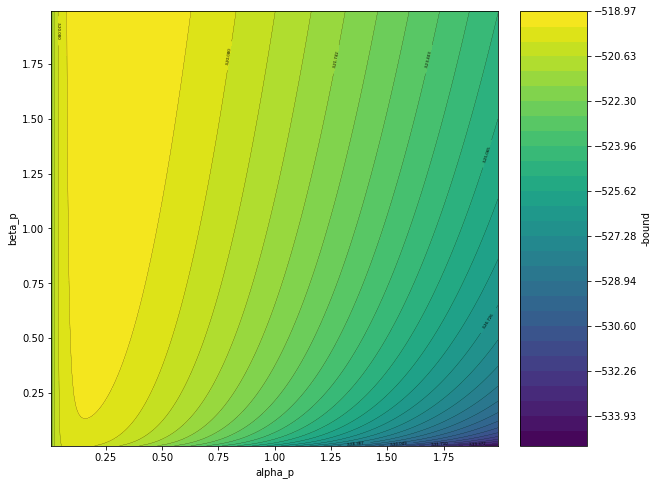

In [4]:
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('alpha_p')
axes.set_ylabel('beta_p')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [5]:
data_contour = pd.read_csv('../../numerical_analysis/contour_gamma_alphas.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

,bound_0,bound_1,bound_2,bound_3,bound_4,bound_5,bound_6,bound_7,bound_8,bound_9,...,bound_189,bound_190,bound_191,bound_192,bound_193,bound_194,bound_195,bound_196,bound_197,bound_198
0,-521.398905,-520.748513,-520.385963,-520.141353,-519.961437,-519.822497,-519.711878,-519.622028,-519.548073,-519.486686,...,-525.885954,-525.937834,-525.989781,-526.041797,-526.093880,-526.146030,-526.198246,-526.250529,-526.302877,-526.355291
1,-520.748513,-520.098121,-519.735571,-519.490961,-519.311045,-519.172104,-519.061486,-518.971636,-518.897681,-518.836294,...,-525.235562,-525.287441,-525.339389,-525.391404,-525.443487,-525.495637,-525.547854,-525.600137,-525.652485,-525.704899
2,-520.385963,-519.735571,-519.373020,-519.128411,-518.948495,-518.809554,-518.698936,-518.609085,-518.535131,-518.473744,...,-524.873012,-524.924891,-524.976839,-525.028854,-525.080937,-525.133087,-525.185304,-525.237586,-525.289935,-525.342349
3,-520.141353,-519.490961,-519.128411,-518.883801,-518.703885,-518.564944,-518.454326,-518.364476,-518.290521,-518.229134,...,-524.628402,-524.680281,-524.732229,-524.784244,-524.836327,-524.888477,-524.940694,-524.992977,-525.045325,-525.097739
4,-519.961437,-519.311045,-518.948495,-518.703885,-518.523969,-518.385029,-518.274410,-518.184560,-518.110605,-518.049218,...,-524.448486,-524.500365,-524.552313,-524.604329,-524.656412,-524.708562,-524.760778,-524.813061,-524.865409,-524.917823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-526.146030,-525.495637,-525.133087,-524.888477,-524.708562,-524.569621,-524.459002,-524.369152,-524.295198,-524.233811,...,-530.633078,-530.684958,-530.736905,-530.788921,-530.841004,-530.893154,-530.945371,-530.997653,-531.050002,-531.102415
195,-526.198246,-525.547854,-525.185304,-524.940694,-524.760778,-524.621838,-524.511219,-524.421369,-524.347414,-524.286027,...,-530.685295,-530.737174,-530.789122,-530.841138,-530.893221,-530.945371,-530.997587,-531.049870,-531.102218,-531.154632
196,-526.250529,-525.600137,-525.237586,-524.992977,-524.813061,-524.674120,-524.563502,-524.473652,-524.399697,-524.338310,...,-530.737578,-530.789457,-530.841405,-530.893420,-530.945503,-530.997653,-531.049870,-531.102153,-531.154501,-531.206915
197,-526.302877,-525.652485,-525.289935,-525.045325,-524.865409,-524.726469,-524.615850,-524.526000,-524.452045,-524.390658,...,-530.789926,-530.841806,-530.893753,-530.945769,-530.997852,-531.050002,-531.102218,-531.154501,-531.206849,-531.259263


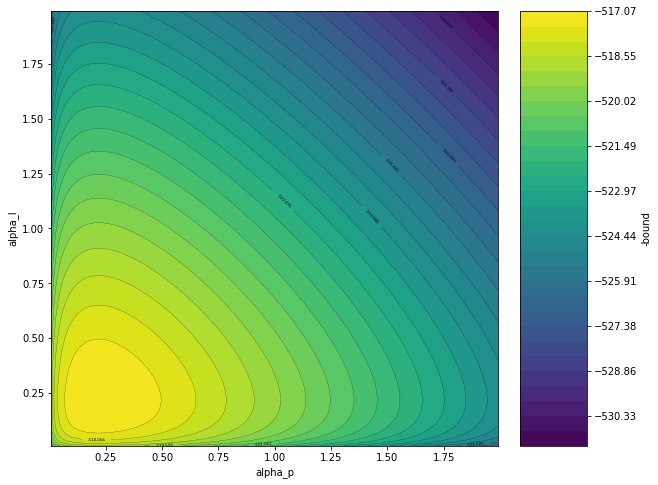

In [6]:
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('alpha_l')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

In [7]:
levels[::40]

array([-531.311677])

In [8]:
alphas = np.load('../../numerical_analysis/alphas.npy')
bound = np.load('../../numerical_analysis/bound.npy')
alphas_p = np.load('../../numerical_analysis/alphas_p.npy')
rb_value_p = np.load('../../numerical_analysis/rb_value_p.npy')


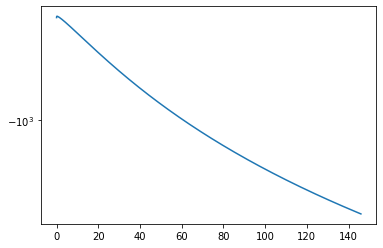

In [9]:
fig, ax = plt.subplots()
ax.plot(alphas_p, rb_value_p)
ax.set_yscale('symlog')

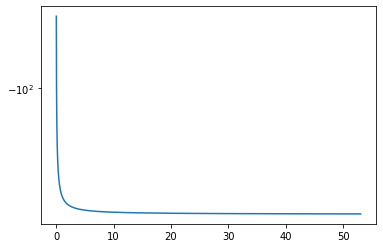

In [10]:
fig, ax = plt.subplots()
ax.plot(alphas, bound)
ax.set_yscale('symlog')

In [11]:
data_contour = pd.read_csv('../contour.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]


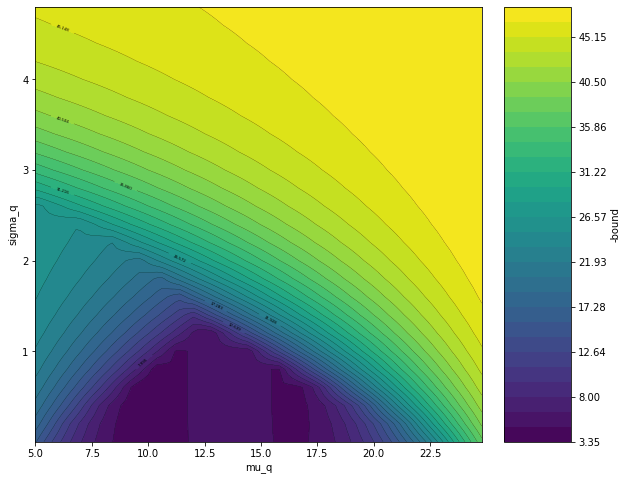

In [12]:
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [13]:
data_contour = pd.read_csv('../contour_1e-06.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]


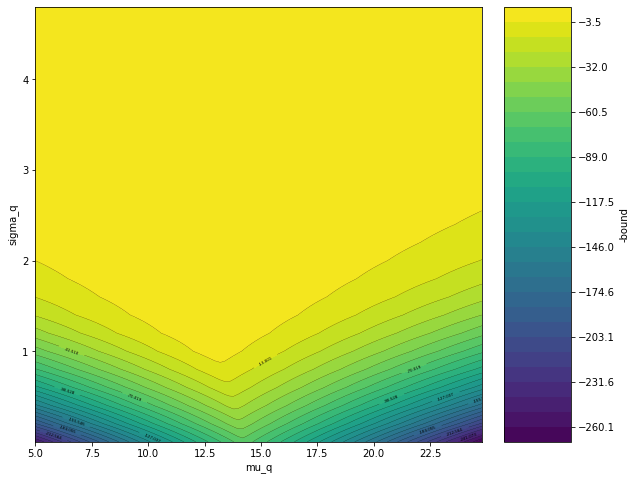

In [14]:
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [15]:
data_contour = pd.read_csv('../contour_0.1.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]


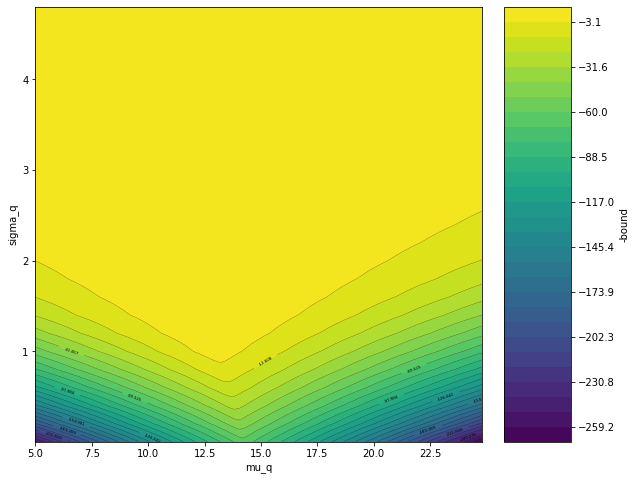

In [16]:
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


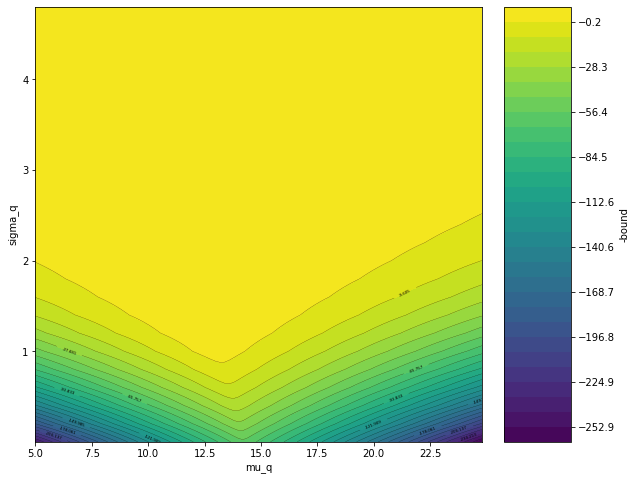

In [17]:
data_contour = pd.read_csv('../contour_0.5.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [34]:
data_contour = pd.read_csv('../contour_0.5.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

,bound_200,bound_201,bound_202,bound_203,bound_204,bound_205,bound_206,bound_207,bound_208,bound_209,...,bound_290,bound_291,bound_292,bound_293,bound_294,bound_295,bound_296,bound_297,bound_298,bound_299
0,-243.155136,-238.203629,-233.292343,-228.421265,-223.590424,-218.799835,-214.049484,-209.339386,-204.669510,-200.039932,...,-219.495850,-224.089890,-228.724091,-233.398544,-238.113144,-242.867996,-247.663010,-252.498184,-257.373596,-262.289124
1,-187.269226,-183.221512,-179.206818,-175.225143,-171.276535,-167.360977,-163.478485,-159.629044,-155.812683,-152.029419,...,-172.207977,-175.963699,-179.752396,-183.574127,-187.428802,-191.316483,-195.237152,-199.190750,-203.177353,-207.196854
2,-141.700897,-138.394608,-135.115509,-131.863586,-128.638870,-125.441391,-122.271149,-119.128143,-116.012390,-112.923935,...,-133.646378,-136.714890,-139.810486,-142.933228,-146.083054,-149.259995,-152.464020,-155.695099,-158.953278,-162.238495
3,-104.626167,-101.929474,-99.255280,-96.603577,-93.974411,-91.367805,-88.783768,-86.222328,-83.683502,-81.167336,...,-102.253571,-104.758087,-107.284927,-109.834122,-112.405624,-114.999451,-117.615601,-120.253998,-122.914719,-125.597672
4,-74.590637,-72.398117,-70.224464,-68.069702,-65.933899,-63.817078,-61.719299,-59.640610,-57.581055,-55.540710,...,-76.768234,-78.808815,-80.867882,-82.945465,-85.041496,-87.156013,-89.288971,-91.440338,-93.610138,-95.798317
5,-50.498322,-48.730400,-46.978989,-45.244171,-43.526085,-41.824837,-40.140541,-38.473347,-36.823387,-35.190845,...,-56.182945,-57.839905,-59.512352,-61.200294,-62.903664,-64.622467,-66.356674,-68.106232,-69.871155,-71.651382
6,-31.703827,-30.313618,-28.939590,-27.581970,-26.241035,-24.917046,-23.610291,-22.321079,-21.049721,-19.796570,...,-39.719997,-41.056072,-42.405434,-43.768059,-45.143875,-46.532867,-47.934959,-49.350113,-50.778313,-52.219490
7,-18.111977,-17.079414,-16.063225,-15.063591,-14.080700,-13.114723,-12.165836,-11.234201,-10.319981,-9.423344,...,-26.818390,-27.880463,-28.954376,-30.040081,-31.137474,-32.246506,-33.367100,-34.499176,-35.642693,-36.797565
8,-9.277987,-8.537300,-7.809845,-7.095646,-6.394737,-5.707153,-5.032925,-4.372087,-3.724676,-3.090740,...,-17.072472,-17.897896,-18.734005,-19.580742,-20.438015,-21.305767,-22.183922,-23.072403,-23.971157,-24.880104
9,-3.650890,-3.109135,-2.577343,-2.055553,-1.543800,-1.042126,-0.550585,-0.069231,0.401867,0.862629,...,-10.030163,-10.659840,-11.298607,-11.946442,-12.603294,-13.269142,-13.943943,-14.627655,-15.320251,-16.021683


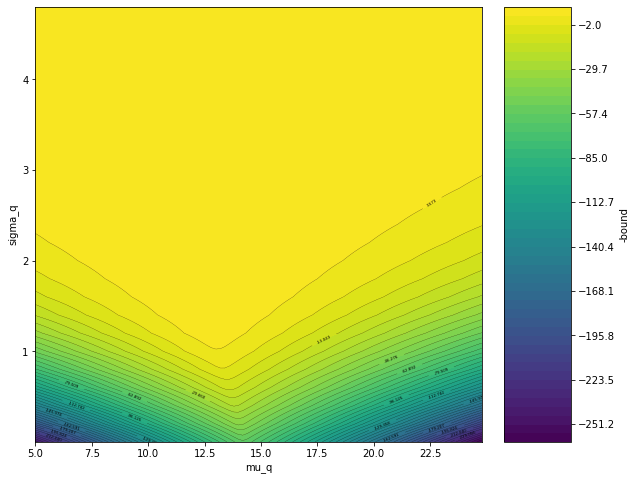

In [36]:

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
fig.savefig('wow.pdf', bbox_inches='tight', pad_inches=0)


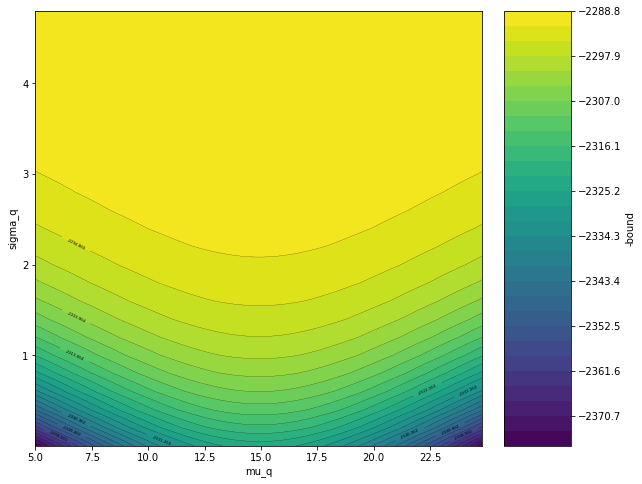

In [19]:
data_contour = pd.read_csv('../contour_0.999.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


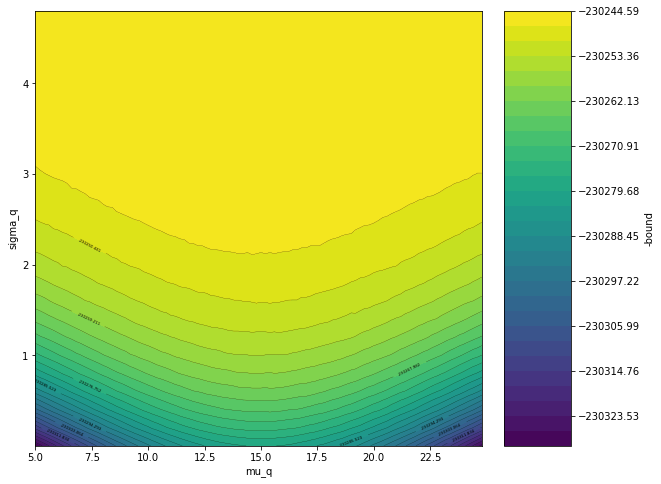

In [20]:
data_contour = pd.read_csv('../contour_0.99999.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


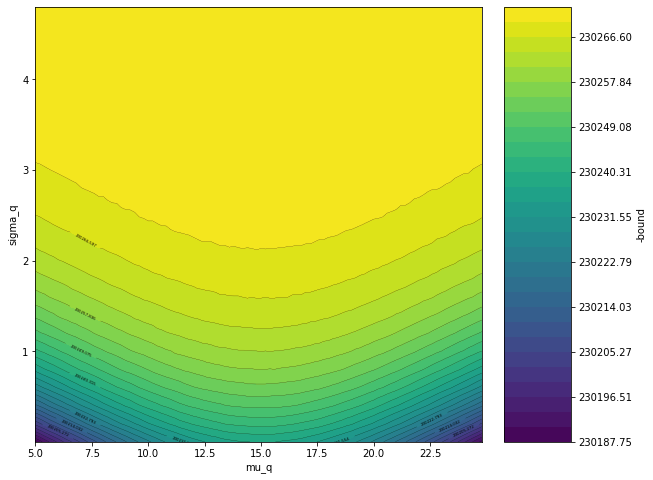

In [21]:
data_contour = pd.read_csv('../contour_1.00001.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


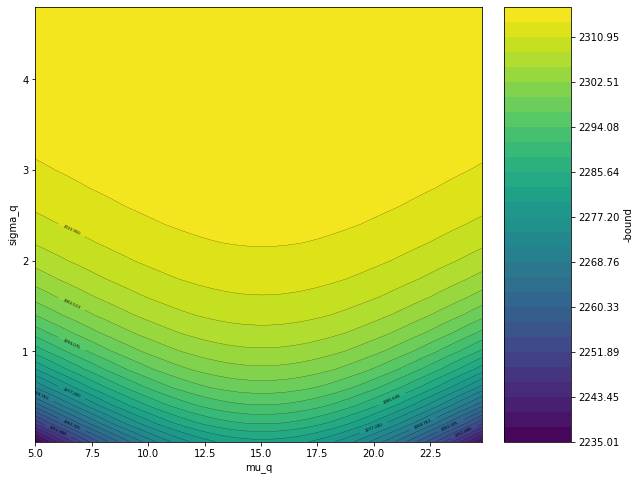

In [22]:
data_contour = pd.read_csv('../contour_1.001.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


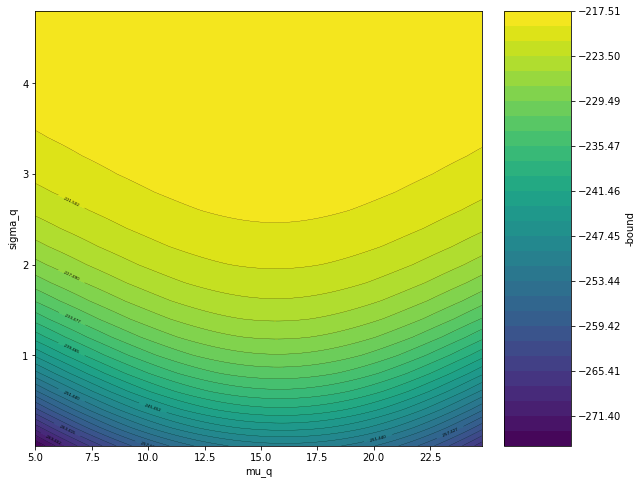

In [23]:
data_contour = pd.read_csv('../contour_1.01.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


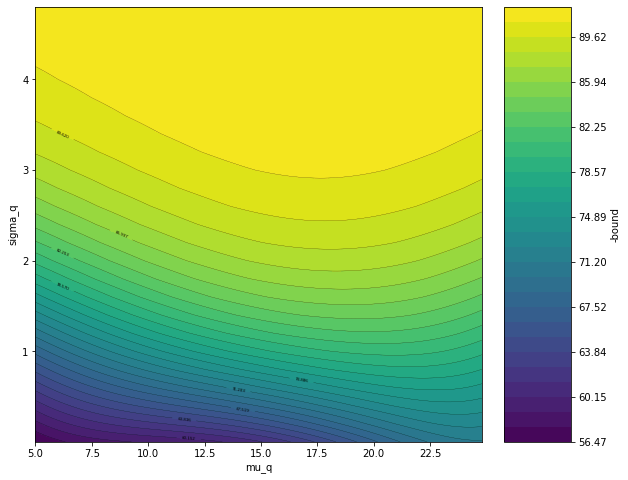

In [24]:
data_contour = pd.read_csv('../contour_1.03.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


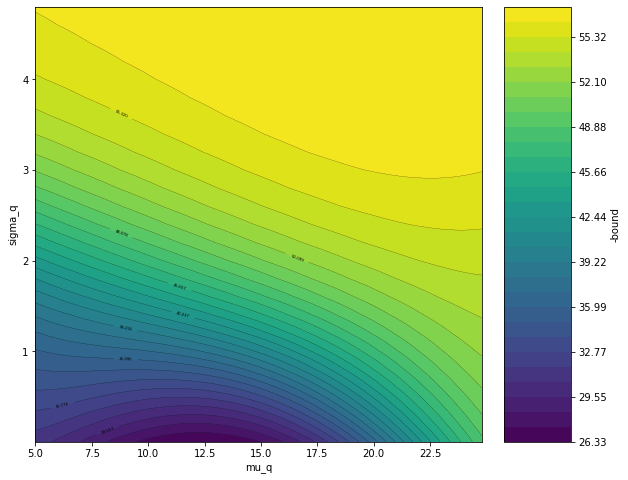

In [25]:
data_contour = pd.read_csv('../contour_1.06.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


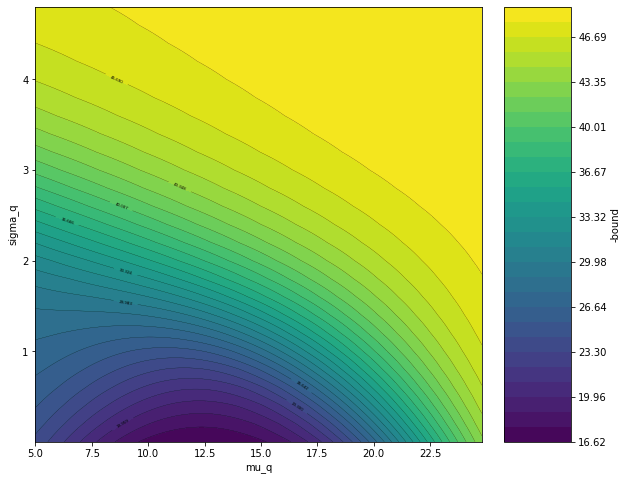

In [26]:
data_contour = pd.read_csv('../contour_1.09.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


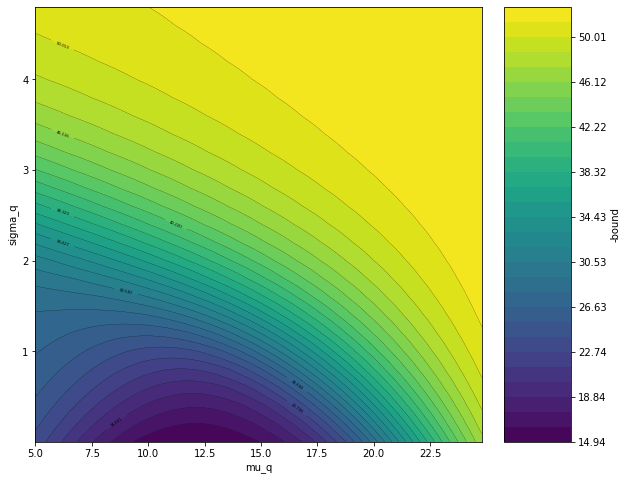

In [27]:
data_contour = pd.read_csv('../contour_1.1.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


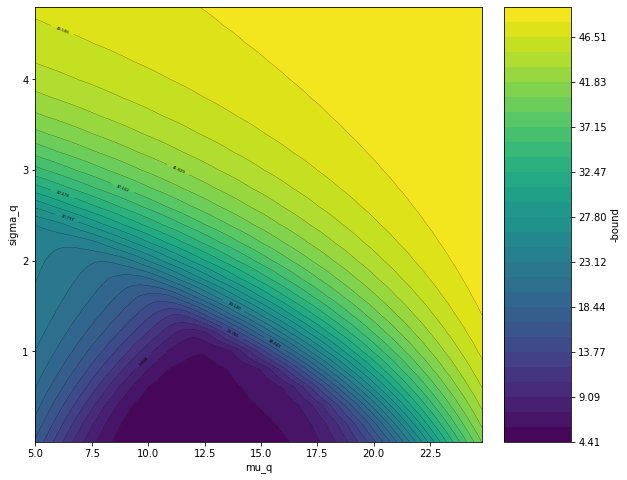

In [28]:
data_contour = pd.read_csv('../contour_1.5.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


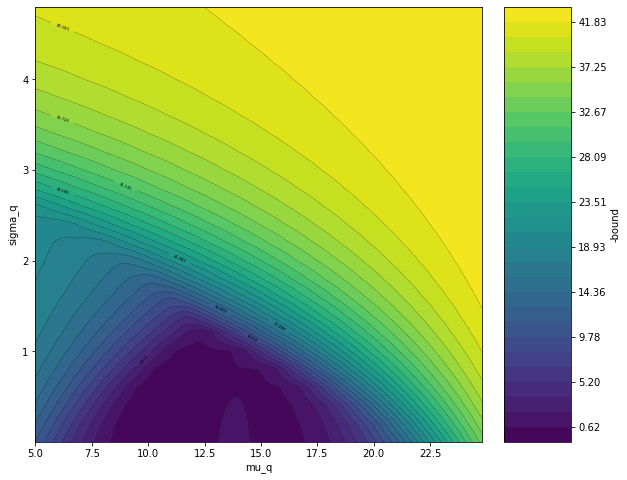

In [29]:
data_contour = pd.read_csv('../contour_2.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


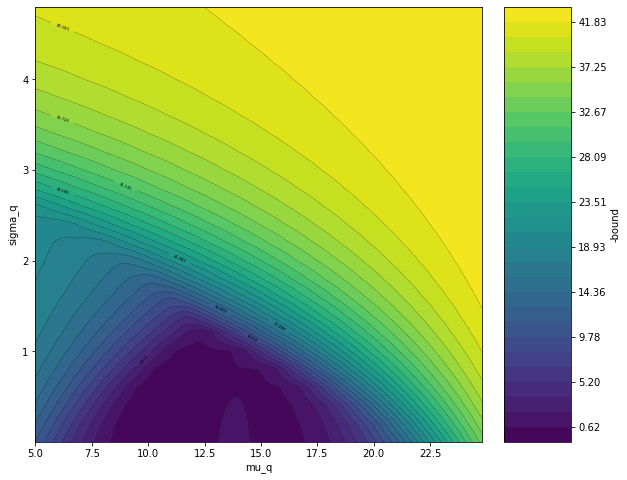

In [30]:
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


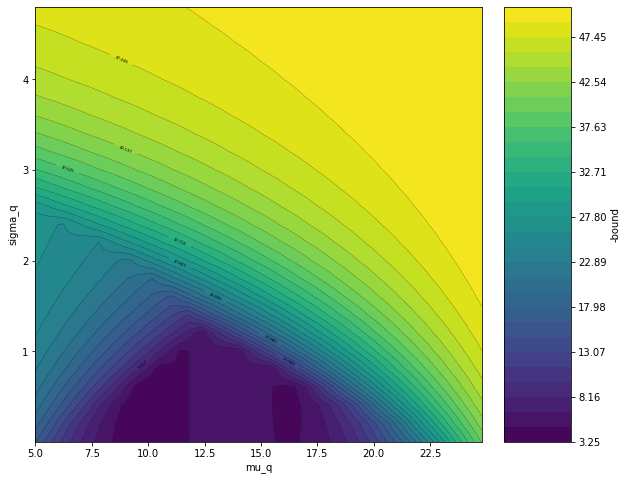

In [31]:
data_contour = pd.read_csv('../contour_1000000000.0.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(5, 25, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
